# Modeling

## Install Requirements

In [2]:
!pip install -r ../requirements.txt

## Import Packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [12]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Fill missing values

### Impute Age with Median

In [18]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [19]:
df["Age"].isnull().sum()

0

### Impute Embarked with Mode

In [20]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [21]:
df["Embarked"].isnull().sum()

0

## Impute Cabin with Random Cabin Num based on Pclass

In [22]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [52]:
unique_cabins_class1 = set([str(i)[0].upper() for i in df[df["Pclass"] == 1]["Cabin"].unique()])
unique_cabins_class2 = set([str(i)[0].upper() for i in df[df["Pclass"] == 2]["Cabin"].unique()])
unique_cabins_class3 = set([str(i)[0].upper() for i in df[df["Pclass"] == 3]["Cabin"].unique()])

nums = np.arange(1, 1000)


In [66]:
def fillCabin(row):
    if pd.isnull(row["Cabin"]):
        if row["Pclass"] == 1:
            txt = np.random.choice(list(unique_cabins_class1)) + str(np.random.choice(nums))
        elif row["Pclass"] == 2:
            txt = np.random.choice(list(unique_cabins_class2)) + str(np.random.choice(nums))
        else:
            txt = np.random.choice(list(unique_cabins_class3)) + str(np.random.choice(nums))
        return txt
    else:
        return row["Cabin"]

In [67]:
df["Cabin"].fillna(df.apply(fillCabin, axis=1), inplace=True)

In [68]:
df["Cabin"].isnull().sum()

0

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Feature Engineering

In [74]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [76]:
df["isAlone"] = df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [110]:
df["Cabin_Letter"] = df["Cabin"].apply(lambda x: str(x)[0].upper())

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  isAlone       891 non-null    int64  
 14  Title         891 non-null    object 
 15  Cabin_Letter  891 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 111.5+ KB


## Exploratory Data Analysis

In [112]:
alone_survival_rate = df.groupby('isAlone')['Survived'].mean()


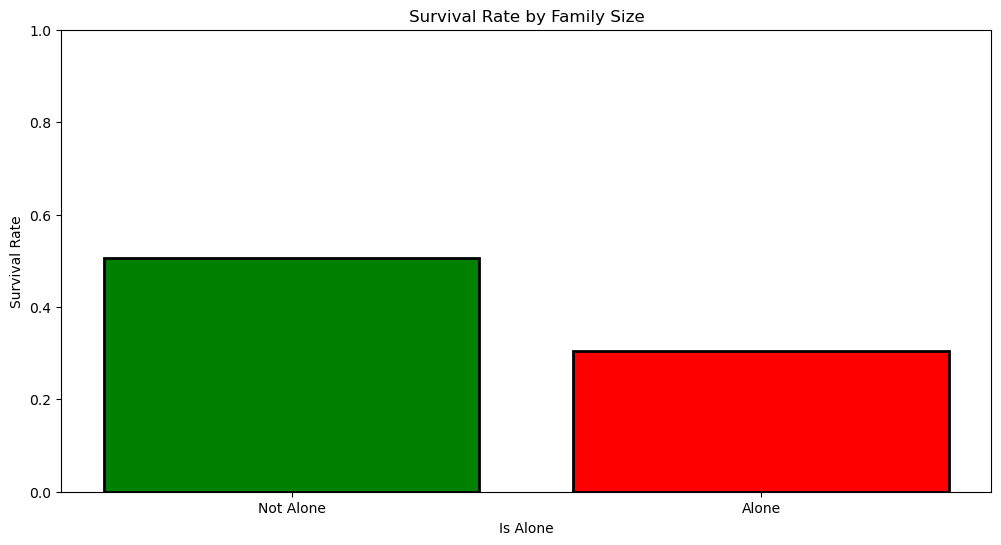

In [113]:
plt.figure(figsize=(12, 6))
plt.bar(alone_survival_rate.index, alone_survival_rate.values, color=['green', 'red'], linewidth=2, edgecolor='black')
plt.title("Survival Rate by Family Size")
plt.xlabel("Is Alone")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.ylim([0, 1])
plt.show()

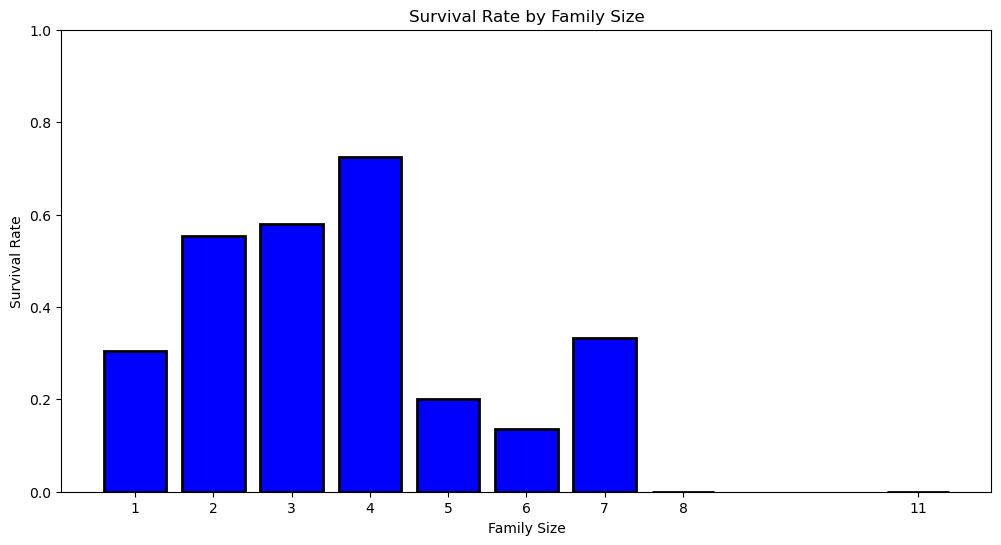

In [114]:
family_size_survival_rate = df.groupby('FamilySize')['Survived'].mean()
plt.figure(figsize=(12, 6))
plt.bar(family_size_survival_rate.index, family_size_survival_rate.values, color='blue', linewidth=2, edgecolor='black')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.xticks(family_size_survival_rate.index)
plt.ylim([0, 1])
plt.show()

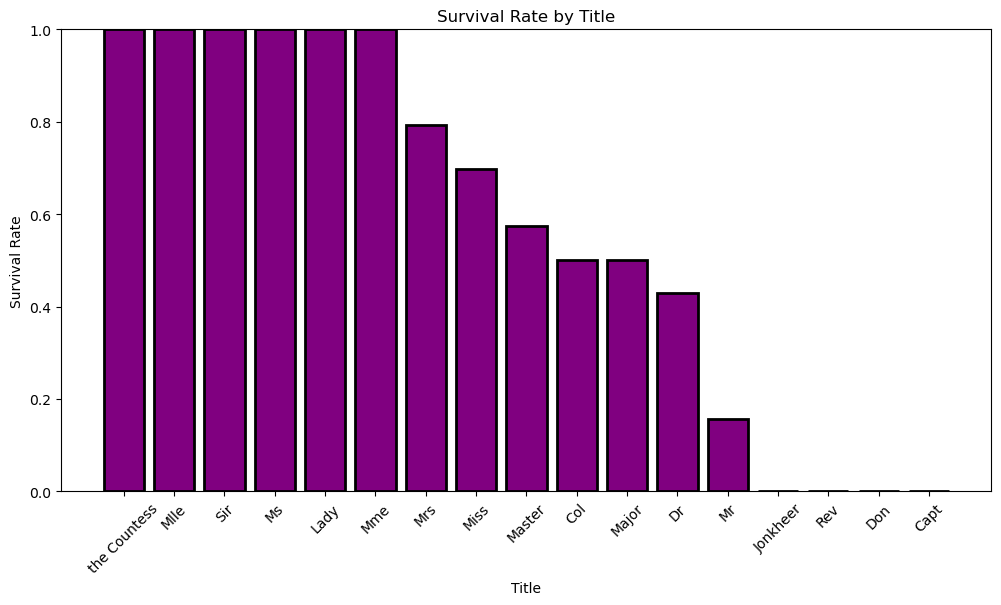

In [115]:
title_survival_rate = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(title_survival_rate.index, title_survival_rate.values, color='purple', linewidth=2, edgecolor='black')
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()

## Feature Engineering Part 2

In [116]:
model_df = df[["PassengerId", "Survived", "Pclass", "Title", "Sex", "Age", "FamilySize", "Fare", "isAlone", "Embarked", "Cabin_Letter"]].copy()

In [117]:
model_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,FamilySize,Fare,isAlone,Embarked,Cabin_Letter
0,1,0,3,Mr,male,22.0,2,7.2500,0,S,N
1,2,1,1,Mrs,female,38.0,2,71.2833,0,C,C
2,3,1,3,Miss,female,26.0,1,7.9250,1,S,G
3,4,1,1,Mrs,female,35.0,2,53.1000,0,S,C
4,5,0,3,Mr,male,35.0,1,8.0500,1,S,E


In [126]:
df["Pclass"].dtype

dtype('int64')

### One Hot Encoding for categorical variables

In [129]:
from sklearn.preprocessing._encoders import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ["Sex", "Title", "Embarked", "Cabin_Letter", "Pclass"]),
    ],
    remainder='passthrough'
)

transformed_data = column_transformer.fit_transform(model_df)

# Get feature names for one-hot encoded columns
ohe_feature_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(['Sex', 'Title', 'Embarked', 'Cabin_Letter', 'Pclass'])
all_feature_names = list(ohe_feature_names) + ['PassengerId', 'Survived', 'Age', 'FamilySize', 'Fare', 'isAlone']

# Convert to DataFrame
encoded_df = pd.DataFrame(transformed_data.toarray(), columns=all_feature_names)

In [130]:
encoded_df.head()

,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,...,Cabin_Letter_T,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,Age,FamilySize,Fare,isAlone
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,22.0,2.0,7.2500,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,38.0,2.0,71.2833,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,26.0,1.0,7.9250,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,4.0,1.0,35.0,2.0,53.1000,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,0.0,35.0,1.0,8.0500,1.0


In [135]:
model_df = encoded_df.copy()
target = "Survived"
features = encoded_df.drop(columns=[target, "PassengerId"]).columns.tolist()

## Train/Test Split

In [167]:
from sklearn.model_selection import train_test_split

X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [168]:
## Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [169]:
## Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       110
         1.0       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



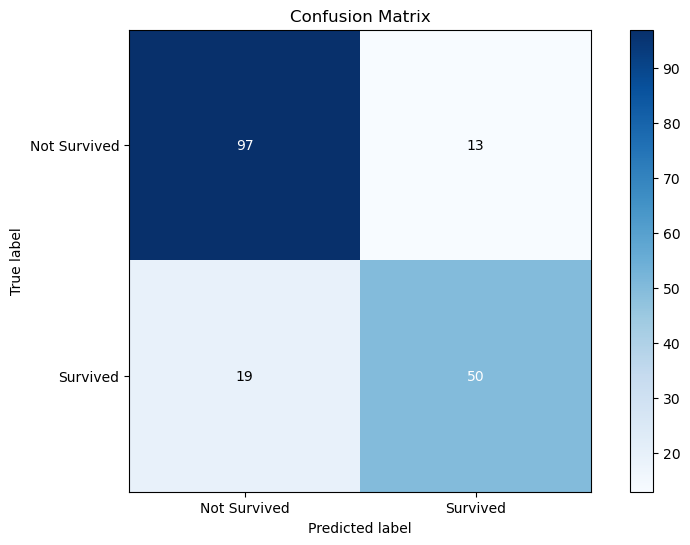

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred already exist
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add the text annotations
thresh = conf_matrix.max() / 2  # threshold for text color
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

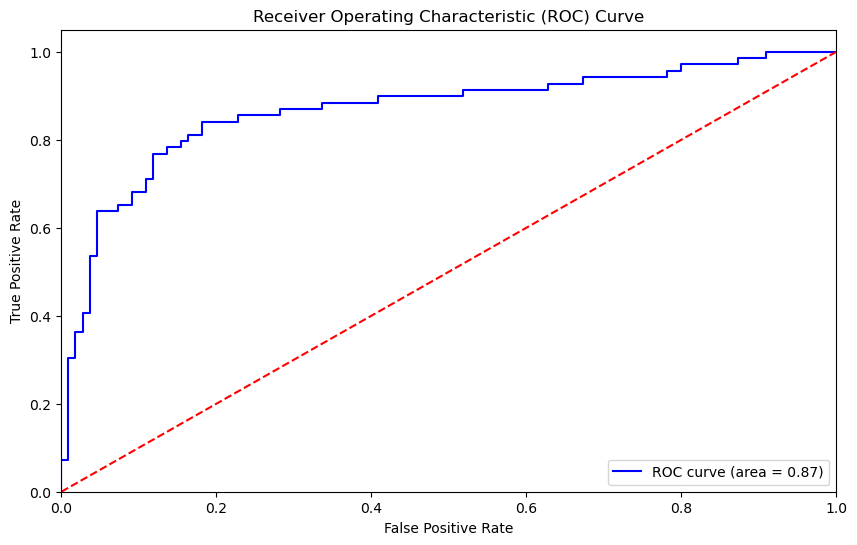

In [160]:
# Plot AUC-ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [162]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {:.2f}".format(accuracy))

Decision Tree Accuracy: 0.79


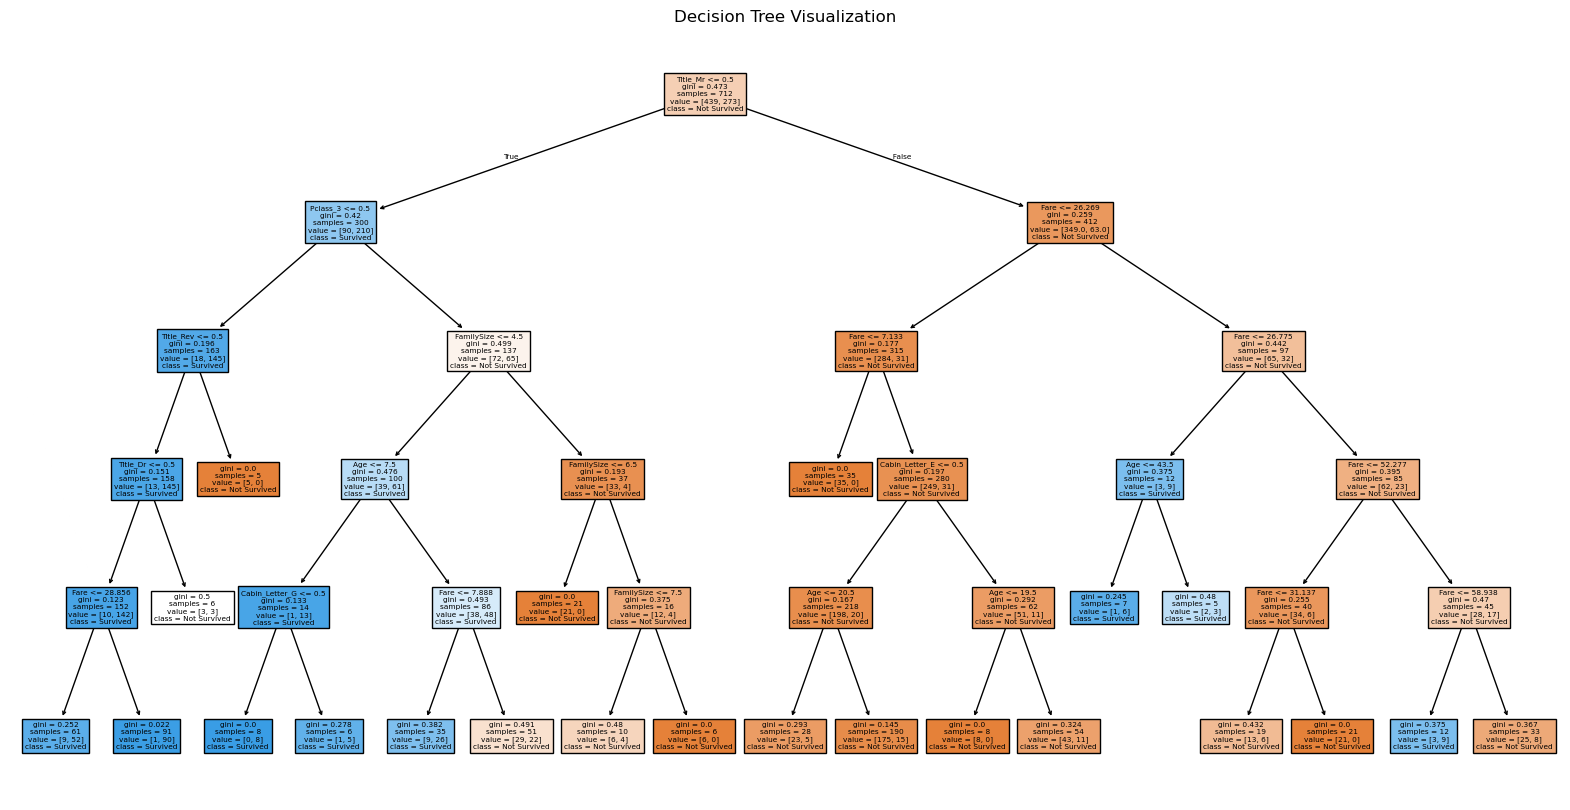

In [163]:
# Display Tree Graph

from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [165]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.82
